Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [16]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [2]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

In [3]:
soup = BeautifulSoup(html_data, "html5lib")
print(soup.prettify())

<html>
 <head>
 </head>
 <body>
  <div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
   <h1>
    We do not allow automated access to our servers.
   </h1>
   <h2>
    <p>
     Automated access to our data is prohibited by our data provider.
    </p>
    <p>
     If you are a user attempting to access the site via a browser, please follow this process to regain access:
    </p>
    <ul>
     <li>
      Go to
      <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">
       whatismyipaddress
      </a>
      and obtain your IPv4 address
     </li>
     <li>
      Email us your IPv4 address at
      <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">
       [email protected]
      </a>
     </li>
     <li>
      We will add you to our whitelist within 24 hours
     </li>
    </ul>
   </h2>
  </div>
  <script data-cfasync

In [4]:
tesla_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("Tesla Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [5]:
tesla_revenue.dropna(axis=0, how='all', subset=['Revenue'])
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [7]:
tesla_revenue.tail(5)

,Date,Revenue


Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [8]:
gme = yf.Ticker('GME')

In [9]:
gme_data = gme.history(period = "max")

In [10]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [11]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

In [12]:
soup = BeautifulSoup(html_data, "html5lib")
print(soup.prettify())

<html>
 <head>
 </head>
 <body>
  <div style="margin: 50px auto; width: 50%; border: 1px solid #dfdfdf; padding: 20px 50px 30px 50px; font-family:helvetica;">
   <h1>
    We do not allow automated access to our servers.
   </h1>
   <h2>
    <p>
     Automated access to our data is prohibited by our data provider.
    </p>
    <p>
     If you are a user attempting to access the site via a browser, please follow this process to regain access:
    </p>
    <ul>
     <li>
      Go to
      <a href="https://whatismyipaddress.com/" rel="noopener noreferrer" target="_blank">
       whatismyipaddress
      </a>
      and obtain your IPv4 address
     </li>
     <li>
      Email us your IPv4 address at
      <a class="__cf_email__" data-cfemail="4821262e270825292b3a273c3a2d262c3b66262d3c" href="/cdn-cgi/l/email-protection">
       [email protected]
      </a>
     </li>
     <li>
      We will add you to our whitelist within 24 hours
     </li>
    </ul>
   </h2>
  </div>
  <script data-cfasync

In [13]:
gme_revenue = pd.DataFrame(columns = ["Date","Revenue"])

for table in soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2: continue
            Date = col[0].text
            Revenue = col[1].text.replace("$","").replace(",","")
               
            gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [14]:
gme_revenue.tail(5)

,Date,Revenue


Question 5 - Tesla Stock and Revenue Dashboard 

In [18]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

NameError: name 'tesla_data' is not defined

Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

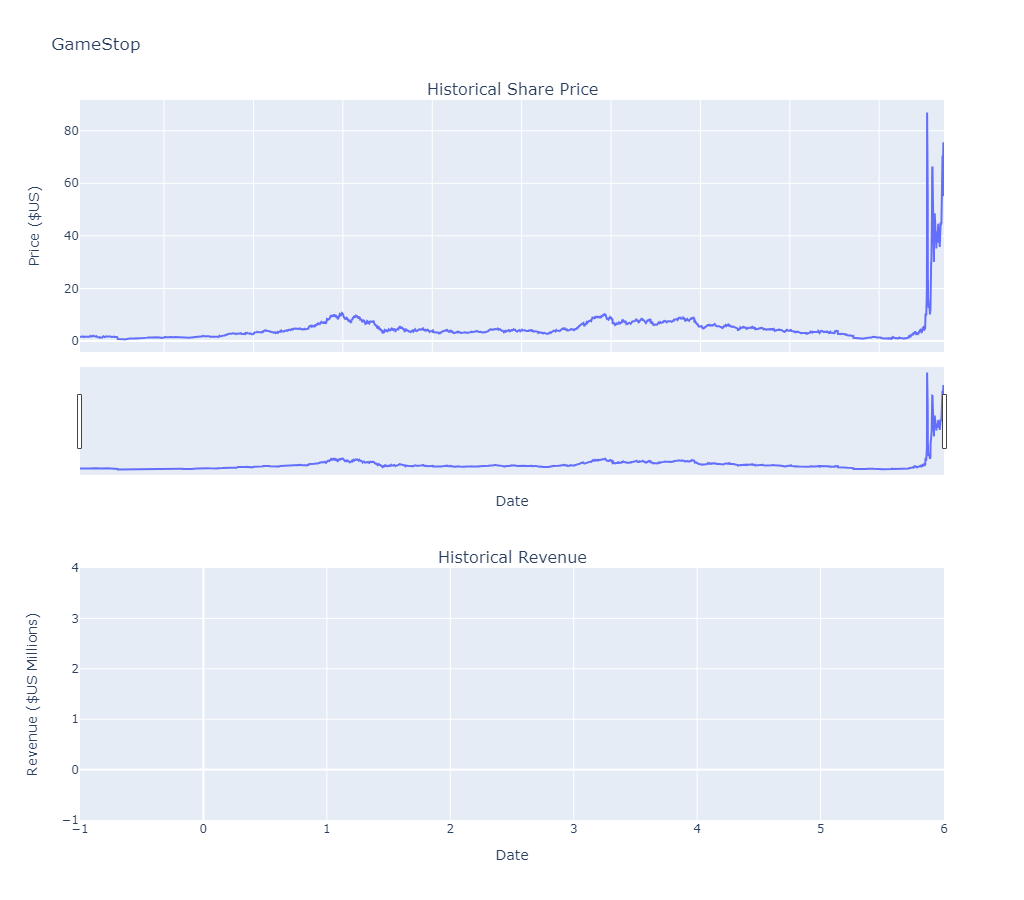

In [20]:
make_graph(gme_data, gme_revenue, 'GameStop')